In this notebook, useful data loading and transforming functions are demonstrated.  The main sources of data are Quandl, Cryptocompare and Yahoo Finance.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
import pickle
import itertools
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', 10)
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.transforms as mtransforms
plt.rcParams['figure.figsize'] = [12, 4]

import quandl

In [3]:
from utils import *

# Quandl

In [4]:
api_key = open(file='quandl_api').read().replace('\n', '')
quandl.ApiConfig.api_key = api_key

## Exchange Data International

One may use [_Exchange Data International_](https://www.quandl.com/publishers/edi) free sample series as follows:

In [7]:
print(os.listdir(QUANDL_PATH + 'EDI/'))

['XASE.csv', 'XASE.pickle', 'XBOM.csv', 'XBOM.pickle', 'XHKG.csv', 'XHKG.pickle', 'XJPX.csv', 'XLON.csv', 'XLON.pickle', 'XNAS.csv', 'XNAS.pickle', 'XNSE.csv', 'XNSE.pickle', 'XNYS.csv', 'XNYS.pickle', 'XSES.csv', 'XSES.pickle', 'XSHE.csv', 'XSHE.pickle', 'XSHG.csv', 'XSHG.pickle', 'XTSE.csv', 'XTSE.pickle', 'XTSX.csv', 'XTSX.pickle']


In [8]:
# tickers, prices = get_quandl_edi(get_quandl_edi(list(QUANDL_FREE_SAMPLES_EDI.keys())), download=True)  # The first time...
tickers, prices = get_quandl_edi(list(QUANDL_FREE_SAMPLES_EDI.keys()))

In [9]:
prices

Open       High        Low      Close    Volume
Ticker      Date                                                            
XNAS/AAXJ   2008-08-15  42.372604  42.372604  42.372604  42.372604     100.0
            2008-08-18  42.068312  42.068312  41.417466  41.417466   25416.0
            2008-08-19  40.859598  40.859598  40.859598  40.859598     100.0
            2008-08-20  41.459729  41.459729  41.434371  41.434371    4000.0
            2008-08-21  41.459729  41.459729  41.434371  41.434371       0.0
...                           ...        ...        ...        ...       ...
XSHE/200026 2018-06-06   6.010000   6.120000   5.960000   6.000000  139600.0
            2018-06-07   6.000000   6.040000   5.980000   6.030000   29600.0
            2018-06-08   6.000000   6.000000   5.970000   5.980000   32600.0
            2018-06-11   5.920000   6.060000   5.920000   5.990000  105000.0
            2018-06-12   5.980000   6.040000   5.980000   6.040000  119200.0

[517903 rows x 5 columns]

In [10]:
print('Number of price series:', len(tickers))

Number of price series: 176


j: 29  -  XTSE/AND


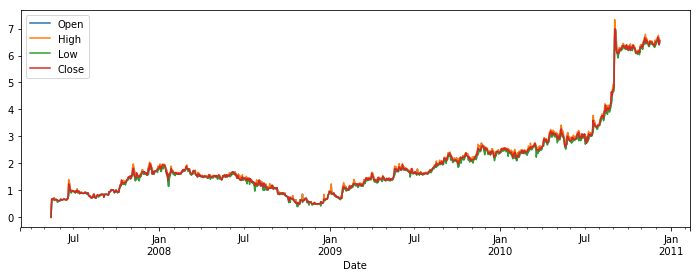

In [11]:
j = np.random.choice(len(tickers) - 1)
ticker_j = list(tickers)[j]
print('j:', j, ' - ', ticker_j)
price_j = prices.loc[ticker_j]
price_j[['Open', 'High', 'Low', 'Close']].plot();

In [12]:
price_j

,Open,High,Low,Close,Volume
Date,,,,,
2007-05-15,0.00,0.00,0.00,0.00,0.0
2007-05-16,0.59,0.66,0.59,0.66,13000.0
2007-05-17,0.69,0.69,0.69,0.69,2500.0
2007-05-18,0.69,0.69,0.69,0.69,0.0
2007-05-21,0.69,0.69,0.69,0.69,0.0
...,...,...,...,...,...
2010-12-03,6.54,6.65,6.52,6.56,3718005.0
2010-12-06,6.56,6.70,6.56,6.67,4835146.0
2010-12-07,6.70,6.75,6.57,6.64,6763611.0


##  Sharadar Equity Prices

One may use [_Sharadar Equity Prices_](https://www.quandl.com/publishers/sharadar) free sample series as follows:

In [24]:
# tickers, prices = get_quandl_sharadar(download=True)  # The first time...
tickers, prices = get_quandl_sharadar(free=False)

In [25]:
print('Number of price series:', len(tickers))

Number of price series: 12871


In [26]:
prices

,,Open,High,Low,Close,Volume,Dividends,Closeunadj,Lastupdated
Ticker,Date,,,,,,,,
AABA,1998-12-31,30.238,31.875,29.000,29.613,37516800.00,0.0,236.900,2018-02-11
AAC1,1998-12-31,3.438,3.750,3.375,3.625,561000.00,0.0,3.625,2018-04-16
AACB,1998-12-31,16.750,16.750,16.438,16.438,1600.00,0.0,16.438,2018-02-11
AAME,1998-12-31,4.750,4.875,4.750,4.875,9700.00,0.0,4.875,2018-02-11
AAN,1998-12-31,4.409,4.444,4.409,4.427,3300.75,0.0,14.940,2018-02-11
...,...,...,...,...,...,...,...,...,...
ZTS,2018-07-09,86.900,87.710,86.620,87.490,1834672.00,0.0,87.490,2018-07-09
ZUMZ,2018-07-09,23.750,24.300,23.650,24.050,408607.00,0.0,24.050,2018-07-09
ZUO,2018-07-09,26.710,27.000,25.610,26.070,1325274.00,0.0,26.070,2018-07-09


j: 10185  -  SIBC


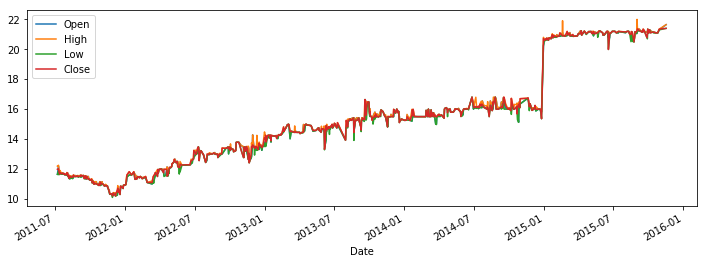

In [29]:
j = np.random.choice(len(tickers) - 1)
ticker_j = list(tickers)[j]
print('j:', j, ' - ', ticker_j)
price_j = prices.loc[ticker_j]
price_j[['Open', 'High', 'Low', 'Close']].plot();

In [28]:
price_j

,Open,High,Low,Close,Volume,Dividends,Closeunadj,Lastupdated
Date,,,,,,,,
1998-12-31,2.625,2.875,2.375,2.563,184625.0,0.0,2.563,2018-04-18
1999-01-04,2.750,3.063,2.625,2.938,209204.0,0.0,2.938,2018-04-18
1999-01-05,2.938,2.938,2.750,2.813,87690.0,0.0,2.813,2018-04-18
1999-01-06,2.938,2.969,2.750,2.750,79794.0,0.0,2.750,2018-04-18
1999-01-07,2.875,2.938,2.750,2.875,58968.0,0.0,2.875,2018-04-18
...,...,...,...,...,...,...,...,...
2000-12-21,0.375,0.406,0.281,0.281,155500.0,0.0,0.281,2018-04-18
2000-12-22,0.281,0.344,0.250,0.313,223204.0,0.0,0.313,2018-04-18
2000-12-26,0.313,0.688,0.250,0.625,292055.0,0.0,0.625,2018-04-18


### Metadata...

In [21]:
shr_meta = pd.read_csv(QUANDL_PATH + 'Sharadar/SHARADAR-TICKERS.csv')
shr_meta.to_excel(QUANDL_PATH + 'Sharadar/SHARADAR-TICKERS.xlsx')
shr_meta.keys()

Index(['table', 'permaticker', 'ticker', 'name', 'exchange', 'isdelisted',
       'category', 'cusips', 'siccode', 'sicsector', 'sicindustry',
       'famasector', 'famaindustry', 'sector', 'industry', 'scalemarketcap',
       'scalerevenue', 'relatedtickers', 'currency', 'location', 'lastupdated',
       'firstadded', 'firstpricedate', 'lastpricedate', 'firstquarter',
       'lastquarter', 'secfilings', 'companysite'],
      dtype='object')

In [22]:
shr_meta.describe(include=np.object)

,table,ticker,name,exchange,isdelisted,category,cusips,sicsector,sicindustry,famaindustry,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
count,10000,10000,10000,10000,10000,10000,9536,9967,9967,9966,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,5023
unique,1,10000,9904,5,2,3,9536,11,431,45,...,29,129,311,725,4281,2560,103,83,9919,5013
top,SF1,FNGN,COMMUNITY FINANCIAL CORP,NASDAQ,N,Domestic,724078100,Technology,PHARMACEUTICAL PREPARATIONS,Business Services,...,USD,CALIFORNIA U.S.A,2018-05-10,2014-09-30,1986-01-01,2018-07-09,1997-12-31,2018-03-31,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.westerngas.com
freq,10000,1,3,5733,5215,8977,1,1763,582,1388,...,9498,1528,437,121,1062,4753,2891,4446,3,2


In [23]:
shr_meta.groupby('currency').count()

,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,sicsector,...,relatedtickers,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
currency,,,,,,,,,,,,,,,,,,,,,
ARS,9,9,9,9,9,9,9,9,9,9,...,0,9,9,9,9,9,9,9,9,9
AUD,14,14,14,14,14,14,14,8,14,13,...,6,14,14,14,14,14,14,14,14,7
BRL,27,27,27,27,27,27,27,26,27,26,...,3,27,27,27,27,27,27,27,27,23
CAD,126,126,126,126,126,126,126,117,126,126,...,31,126,126,126,126,126,126,126,126,73
CHF,5,5,5,5,5,5,5,5,5,5,...,1,5,5,5,5,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEK,7,7,7,7,7,7,7,6,7,7,...,3,7,7,7,7,7,7,7,7,2
TRY,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
TWD,7,7,7,7,7,7,7,6,7,7,...,1,7,7,7,7,7,7,7,7,5


### Train, Dev, Test samples 

In [31]:
N = len(tickers)
train, dev = round(0.7 * N), round(0.15 * N)
test = N - train - dev
print('N:', N, ', Tain:', train, ', Dev:', dev, ', Test:', test)

N: 12871 , Tain: 9010 , Dev: 1931 , Test: 1930


In [32]:
np.random.seed(123)
tickers_full = list(np.random.permutation(tickers))
tickers_train = tickers_full[:train]
tickers_dev = tickers_full[train:(train + dev)]
tickers_test = tickers_full[-test:]
assert len(tickers_train + tickers_dev + tickers_test) == N

In [40]:
# prices_train = prices.loc[tickers_train]
for t in tickers_train:
    prices.loc[t].reset_index().to_feather(fname=QUANDL_PATH + 'Sharadar/train/' + t + '.feather')

In [34]:
for t in tickers_dev:
    prices.loc[t].reset_index().to_feather(fname=QUANDL_PATH + 'Sharadar/dev/' + t + '.feather')

In [38]:
for t in tickers_test:
    prices.loc[t].reset_index().to_feather(fname=QUANDL_PATH + 'Sharadar/test/' + t + '.feather')

## Cryptocompare

## Yahoo Finance

# Data Cleaning

* OHLC: open and close within [low, high].

## Data Transforms

* Weekly and monthly OHLC prices.
* Zero volume days.
* Returns.
* Technical Indicators (volatility, skewness, etc.)

In [ ]:
weekly_j = daily_to_weekly_prices(price_j)

In [ ]:
weekly_j[['Open', 'High', 'Low', 'Close']].plot();